<a href="https://colab.research.google.com/github/danhorsley/DS-Unit-1-Sprint-2-Data-Wrangling/blob/master/Copy_of_DS_Unit_1_Sprint_Challenge_2_Data_Wrangling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Science Unit 1 Sprint Challenge 2

## Data Wrangling

In this Sprint Challenge you will use data from [Gapminder](https://www.gapminder.org/about-gapminder/), a Swedish non-profit co-founded by Hans Rosling. "Gapminder produces free teaching resources making the world understandable based on reliable statistics."
- [Cell phones (total), by country and year](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--cell_phones_total--by--geo--time.csv)
- [Population (total), by country and year](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--population_total--by--geo--time.csv)
- [Geo country codes](https://github.com/open-numbers/ddf--gapminder--systema_globalis/blob/master/ddf--entities--geo--country.csv)

These two links have everything you need to successfully complete the Sprint Challenge!
- [Pandas documentation: Working with Text Data](https://pandas.pydata.org/pandas-docs/stable/text.html]) (one question)
- [Pandas Cheat Sheet](https://github.com/pandas-dev/pandas/blob/master/doc/cheatsheet/Pandas_Cheat_Sheet.pdf) (everything else)

## Part 0. Load data

You don't need to add or change anything here. Just run this cell and it loads the data for you, into three dataframes.

In [0]:
import pandas as pd

cell_phones = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--cell_phones_total--by--geo--time.csv')

population = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--population_total--by--geo--time.csv')

geo_country_codes = (pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--entities--geo--country.csv')
                       .rename(columns={'country': 'geo', 'name': 'country'}))

## Part 1. Join data

First, join the `cell_phones` and `population` dataframes (with an inner join on `geo` and `time`).

The resulting dataframe's shape should be: (8590, 4)

In [2]:
#takign a look at the dataframes
cell_phones.head()

,geo,time,cell_phones_total
0,abw,1960,0.0
1,abw,1965,0.0
2,abw,1970,0.0
3,abw,1975,0.0
4,abw,1976,0.0


In [3]:
population.head()

,geo,time,population_total
0,afg,1800,3280000
1,afg,1801,3280000
2,afg,1802,3280000
3,afg,1803,3280000
4,afg,1804,3280000


In [0]:
#mergin the dataframes on an inner on geo and time
merged_pop_cell = pd.merge(population,cell_phones, how='inner',on=['geo','time'])

In [5]:
#taking a look at results
merged_pop_cell.head()

,geo,time,population_total,cell_phones_total
0,afg,1960,8996351,0.0
1,afg,1965,9938414,0.0
2,afg,1970,11126123,0.0
3,afg,1975,12590286,0.0
4,afg,1976,12840299,0.0


Then, select the `geo` and `country` columns from the `geo_country_codes` dataframe, and join with your population and cell phone data.

The resulting dataframe's shape should be: (8590, 5)

In [6]:
#looking at geo country codes
geo_country_codes.head()

,geo,alt_5,alternative_1,alternative_2,alternative_3,alternative_4_cdiac,arb1,arb2,arb3,arb4,...,latitude,longitude,main_religion_2008,country,pandg,un_state,unicode_region_subtag,upper_case_name,world_4region,world_6region
0,abkh,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Abkhazia,NaN,False,NaN,NaN,europe,europe_central_asia
1,abw,NaN,NaN,NaN,NaN,Aruba,NaN,NaN,NaN,NaN,...,12.50000,-69.96667,christian,Aruba,NaN,False,AW,ARUBA,americas,america
2,afg,NaN,Islamic Republic of Afghanistan,NaN,NaN,Afghanistan,NaN,NaN,NaN,NaN,...,33.00000,66.00000,muslim,Afghanistan,AFGHANISTAN,True,AF,AFGHANISTAN,asia,south_asia
3,ago,NaN,NaN,NaN,NaN,Angola,NaN,NaN,NaN,NaN,...,-12.50000,18.50000,christian,Angola,ANGOLA,True,AO,ANGOLA,africa,sub_saharan_africa
4,aia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,18.21667,-63.05000,christian,Anguilla,NaN,False,AI,ANGUILLA,americas,america


In [8]:
#making a datframe of columns required
geo_geo_country = geo_country_codes[['geo','country']]
geo_geo_country.head()

,geo,country
0,abkh,Abkhazia
1,abw,Aruba
2,afg,Afghanistan
3,ago,Angola
4,aia,Anguilla


In [9]:
#making merged df
df = pd.merge(merged_pop_cell,geo_geo_country)
df.head()

,geo,time,population_total,cell_phones_total,country
0,afg,1960,8996351,0.0,Afghanistan
1,afg,1965,9938414,0.0,Afghanistan
2,afg,1970,11126123,0.0,Afghanistan
3,afg,1975,12590286,0.0,Afghanistan
4,afg,1976,12840299,0.0,Afghanistan


## Part 2. Make features

Calculate the number of cell phones per person, and add this column onto your dataframe.

(You've calculated correctly if you get 1.220 cell phones per person in the United States in 2017.)

In [10]:
df['cell_phones_per_p'] = df['cell_phones_total']/df['population_total']
df.head()

,geo,time,population_total,cell_phones_total,country,cell_phones_per_p
0,afg,1960,8996351,0.0,Afghanistan,0.0
1,afg,1965,9938414,0.0,Afghanistan,0.0
2,afg,1970,11126123,0.0,Afghanistan,0.0
3,afg,1975,12590286,0.0,Afghanistan,0.0
4,afg,1976,12840299,0.0,Afghanistan,0.0


In [16]:
#checking you get 1.22 cell phones per person in US in 2017
df.loc[df['time'] == 2017].loc[df['geo']=='usa']

,geo,time,population_total,cell_phones_total,country,cell_phones_per_p
8134,usa,2017,324459463,395881000.0,United States,1.220125


In [0]:
#we get a matching answer

Modify the `geo` column to make the geo codes uppercase instead of lowercase.

In [17]:
df['geo'] = df['geo'].str.upper()
df.head()

,geo,time,population_total,cell_phones_total,country,cell_phones_per_p
0,AFG,1960,8996351,0.0,Afghanistan,0.0
1,AFG,1965,9938414,0.0,Afghanistan,0.0
2,AFG,1970,11126123,0.0,Afghanistan,0.0
3,AFG,1975,12590286,0.0,Afghanistan,0.0
4,AFG,1976,12840299,0.0,Afghanistan,0.0


## Part 3. Process data

Use the describe function, to describe your dataframe's numeric columns, and then its non-numeric columns.

(You'll see the time period ranges from 1960 to 2017, and there are 195 unique countries represented.)

In [22]:
#describing non numeric columns
import numpy as np
df.describe(exclude = [np.number])

,geo,country
count,8590,8590
unique,195,195
top,CHL,Nepal
freq,46,46


In [23]:
#and now numeric
df.describe(include = [np.number])

,time,population_total,cell_phones_total,cell_phones_per_p
count,8590.000000,8.590000e+03,8.590000e+03,8590.000000
mean,1994.193481,2.983823e+07,9.004950e+06,0.279639
std,14.257975,1.161284e+08,5.573408e+07,0.454247
min,1960.000000,4.433000e+03,0.000000e+00,0.000000
25%,1983.000000,1.456148e+06,0.000000e+00,0.000000
50%,1995.000000,5.725062e+06,6.200000e+03,0.001564
75%,2006.000000,1.810581e+07,1.697652e+06,0.461149
max,2017.000000,1.409517e+09,1.474097e+09,2.490243


In 2017, what were the top 5 countries with the most cell phones total?

Your list of countries should have these totals:

| country | cell phones total |
|:-------:|:-----------------:|
|    ?    |     1,474,097,000 |
|    ?    |     1,168,902,277 |
|    ?    |       458,923,202 |
|    ?    |       395,881,000 |
|    ?    |       236,488,548 |



In [0]:
# This optional code formats float numbers with comma separators
pd.options.display.float_format = '{:,}'.format

In [25]:
#making a new dataframe of only 2017 data
df_2017 = df[df['time']==2017]
df_2017.head()

,geo,time,population_total,cell_phones_total,country,cell_phones_per_p
45,AFG,2017,35530081,"23,929,713.0",Afghanistan,0.6735057260353557
91,AGO,2017,29784193,"13,323,952.0",Angola,0.4473497737541521
137,ALB,2017,2930187,"3,497,950.0",Albania,1.19376340144844
183,AND,2017,76965,"80,337.0",Andorra,1.0438121223932957
219,ARE,2017,9400145,"19,826,224.0",United Arab Emirates,2.109140231347495


In [28]:
#now we sort it by cell phones total
df_2017.sort_values(by=['cell_phones_total'],ascending=False).head()

,geo,time,population_total,cell_phones_total,country,cell_phones_per_p
1496,CHN,2017,1409517397,"1,474,097,000.0",China,1.0458168186766978
3595,IND,2017,1339180127,"1,168,902,277.0",India,0.8728491809526382
3549,IDN,2017,263991379,"458,923,202.0",Indonesia,1.738402230172827
8134,USA,2017,324459463,"395,881,000.0",United States,1.2201246847283354
1084,BRA,2017,209288278,"236,488,548.0",Brazil,1.1299655683535224


2017 was the first year that China had more cell phones than people.

What was the first year that the USA had more cell phones than people?

In [34]:
#first checking the first year china has more cell phones than people
df_china_more = df[df['cell_phones_total']>=df['population_total']].loc[df['country']=='China']
df_china_more.head()

,geo,time,population_total,cell_phones_total,country,cell_phones_per_p
1496,CHN,2017,1409517397,"1,474,097,000.0",China,1.0458168186766978


In [35]:
#now doing same for usa
df_usa_more = df[df['cell_phones_total']>=df['population_total']].loc[df['country']=='United States']
df_usa_more.head()

,geo,time,population_total,cell_phones_total,country,cell_phones_per_p
8131,USA,2014,317718779,"355,500,000.0",United States,1.118914031833164
8132,USA,2015,319929162,"382,307,000.0",United States,1.1949739048796058
8133,USA,2016,322179605,"395,881,000.0",United States,1.228758722948959
8134,USA,2017,324459463,"395,881,000.0",United States,1.2201246847283354


In [0]:
#so 2014 was the first year USA had more cell phones than people

## Part 4. Reshape data

Create a pivot table:
- Columns: Years 2007—2017
- Rows: China, India, United States, Indonesia, Brazil (order doesn't matter)
- Values: Cell Phones Total

The table's shape should be: (5, 11)

In [38]:
#first maskign original dataframe as directed
country_list = ['China','India','United States','Indonesia','Brazil']
year_list = [x for x in range (2007,2018)]
df_mask = df[df['country'].isin(country_list)].loc[df['time'].isin(year_list)]
df_mask.head()

,geo,time,population_total,cell_phones_total,country,cell_phones_per_p
1074,BRA,2007,191026637,"120,980,103.0",Brazil,0.6333153580042348
1075,BRA,2008,192979029,"150,641,403.0",Brazil,0.7806102237150339
1076,BRA,2009,194895996,"169,385,584.0",Brazil,0.869107562373934
1077,BRA,2010,196796269,"196,929,978.0",Brazil,1.000679428531239
1078,BRA,2011,198686688,"234,357,507.0",Brazil,1.1795330092774006


In [40]:
#now making a pivot of that table
df_mask_pivot = df_mask.pivot_table(index = 'country',columns = 'time',values = 'cell_phones_total')
df_mask_pivot.head()

time,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
country,,,,,,,,,,,
Brazil,"120,980,103.0","150,641,403.0","169,385,584.0","196,929,978.0","234,357,507.0","248,323,703.0","271,099,799.0","280,728,796.0","257,814,274.0","244,067,356.0","236,488,548.0"
China,"547,306,000.0","641,245,000.0","747,214,000.0","859,003,000.0","986,253,000.0","1,112,155,000.0","1,229,113,000.0","1,286,093,000.0","1,291,984,200.0","1,364,934,000.0","1,474,097,000.0"
India,"233,620,000.0","346,890,000.0","525,090,000.0","752,190,000.0","893,862,478.0","864,720,917.0","886,304,245.0","944,008,677.0","1,001,056,000.0","1,127,809,000.0","1,168,902,277.0"
Indonesia,"93,386,881.0","140,578,243.0","163,676,961.0","211,290,235.0","249,805,619.0","281,963,665.0","313,226,914.0","325,582,819.0","338,948,340.0","385,573,398.0","458,923,202.0"
United States,"249,300,000.0","261,300,000.0","274,283,000.0","285,118,000.0","297,404,000.0","304,838,000.0","310,698,000.0","355,500,000.0","382,307,000.0","395,881,000.0","395,881,000.0"


In [41]:
#checking shape
df_mask_pivot.shape

(5, 11)

#### OPTIONAL BONUS QUESTION!

Sort these 5 countries, by biggest increase in cell phones from 2007 to 2017.

Which country had 935,282,277 more cell phones in 2017 versus 2007?

In [43]:
#first making a new column to calculate difference between 2017 and 2017
df_mask_pivot['cell_difference'] = df_mask_pivot[2017]-df_mask_pivot[2007]
df_mask_pivot.head()

time,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,cell_difference
country,,,,,,,,,,,,
Brazil,"120,980,103.0","150,641,403.0","169,385,584.0","196,929,978.0","234,357,507.0","248,323,703.0","271,099,799.0","280,728,796.0","257,814,274.0","244,067,356.0","236,488,548.0","115,508,445.0"
China,"547,306,000.0","641,245,000.0","747,214,000.0","859,003,000.0","986,253,000.0","1,112,155,000.0","1,229,113,000.0","1,286,093,000.0","1,291,984,200.0","1,364,934,000.0","1,474,097,000.0","926,791,000.0"
India,"233,620,000.0","346,890,000.0","525,090,000.0","752,190,000.0","893,862,478.0","864,720,917.0","886,304,245.0","944,008,677.0","1,001,056,000.0","1,127,809,000.0","1,168,902,277.0","935,282,277.0"
Indonesia,"93,386,881.0","140,578,243.0","163,676,961.0","211,290,235.0","249,805,619.0","281,963,665.0","313,226,914.0","325,582,819.0","338,948,340.0","385,573,398.0","458,923,202.0","365,536,321.0"
United States,"249,300,000.0","261,300,000.0","274,283,000.0","285,118,000.0","297,404,000.0","304,838,000.0","310,698,000.0","355,500,000.0","382,307,000.0","395,881,000.0","395,881,000.0","146,581,000.0"


In [46]:
#now sorting it by the new column
df_mask_pivot['cell_difference'].sort_values(ascending=False)

country
India           935,282,277.0
China           926,791,000.0
Indonesia       365,536,321.0
United States   146,581,000.0
Brazil          115,508,445.0
Name: cell_difference, dtype: float64

In [0]:
#india had 935,282,277 more phones in 2017 than 2007

If you have the time and curiosity, what other questions can you ask and answer with this data?

In [51]:
#makign a new pivot based on cell phones per person for the some more countries and different  years
country_list2 = ['China','India','United States','Indonesia','Brazil','France','Germany','Canada','United Kingdom','Russia']
year_list2 = [x for x in range (1990,2018)]
df_mask2 = df[df['country'].isin(country_list2)].loc[df['time'].isin(year_list2)]
df_mask2.head()

,geo,time,population_total,cell_phones_total,country,cell_phones_per_p
1057,BRA,1990,149352145,667.0,Brazil,4.465955276370486e-06
1058,BRA,1991,151976577,"6,700.0",Brazil,4.408574092308975e-05
1059,BRA,1992,154564278,"32,000.0",Brazil,0.00020703360707963843
1060,BRA,1993,157132682,"182,000.0",Brazil,0.0011582568163636385
1061,BRA,1994,159705123,"574,009.0",Brazil,0.003594180256822444


In [52]:
df_mask_pivot2 = df_mask2.pivot_table(index = 'country',columns = 'time',values = 'cell_phones_per_p')
df_mask_pivot2.head(20)

time,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
country,,,,,,,,,,,,,,,,,,,,,
Brazil,4.465955276370486e-06,4.408574092308975e-05,0.00020703360707963843,0.0011582568163636385,0.003594180256822444,0.00792088623513595,0.01514828645785562,0.027156856643143695,0.043298996818722665,0.0870153037195237,...,0.7806102237150339,0.869107562373934,1.000679428531239,1.1795330092774006,1.2381456217733038,1.3393687626918995,1.3746853195773652,1.2517558521007175,1.1753623336716303,1.1299655683535224
Canada,0.021080155477909687,0.027664178986861146,0.03616820536668974,0.04642708134841529,0.06427916059800894,0.08829776864176234,0.11807992078355467,0.14028622402656576,0.1771481298346677,0.22693453485276296,...,0.6613620396839377,0.70470609929952,0.7558210931722594,0.7771010667420374,0.7942532966024611,0.804413609850039,0.8085723895994936,0.8279621957440602,0.847400133293572,0.858956669605252
China,1.5624610856012716e-05,3.998037234828082e-05,0.00014696214842247426,0.0005241843143031562,0.0012758423868969712,0.002926754510938418,0.005482481399497835,0.010510163695231672,0.018827693383494954,0.03394681871590201,...,0.4769694564014336,0.5526452439590929,0.6317336105130495,0.7212191838989495,0.8087231797896388,0.8888624772913624,0.9251732891877361,0.9248087286588194,0.9725213003418065,1.0458168186766978
France,0.004971837228158611,0.006551625709921059,0.007595182313420529,0.009905650411586702,0.015226589674499486,0.022363597987568755,0.04209765969866951,0.09899530141170367,0.1898893029771311,0.36134367348147106,...,0.9300882837835213,0.9239159417390265,0.9168330775159876,0.9443104231388764,0.9783174771577561,0.9906771311984025,1.019229626600689,1.0345003966275235,1.0440401670624957,1.0621341964397784
Germany,0.0034455860453872595,0.006689557625821199,0.012141619740720345,0.022036463745543845,0.03077311213629391,0.045851456249635957,0.06769308559219604,0.10154617922930081,0.17071326512622842,0.28774590271974493,...,1.3006512656872327,1.2968468638265835,1.0927774886848391,1.123137648735426,1.139808799294325,1.2309583325760385,1.2213819520169797,1.1793245317163092,1.2631436771180626,1.2908847558493641
India,0.0,0.0,0.0,0.0,0.0,7.983485013909072e-05,0.00033503858674709764,0.0008841330440951188,0.0011766048644774331,0.0018214012330324291,...,0.2897639364571018,0.43243260800225297,0.6110493897259677,0.7166746768185286,0.6846206123225949,0.6932038505029893,0.7296069065451255,0.7647171280133154,0.8517092569576913,0.8728491809526382
Indonesia,9.97371972252534e-05,0.00013285957224753553,0.00018931001203273737,0.00027995669289261583,0.00040229905681846167,0.001069482638389293,0.0028137832355219308,0.004517028879835775,0.005181037753763517,0.010646382186123064,...,0.5952687752989215,0.6838666086394296,0.8712132730812926,1.0166788063715317,1.1329154749967245,1.2428048309037323,1.2761392028716716,1.3129282839422685,1.4766395061654258,1.738402230172827
Russia,0.0,2.026535482630031e-06,4.045361310602673e-05,6.73712019089118e-05,0.0001869392441729133,0.0005969835666459024,0.001506018034613576,0.0032813720332614347,0.005069581526318986,0.009329107361524884,...,1.394449929326777,1.6076983347131493,1.6603758295907463,1.4222111909937898,1.4507334884402971,1.52022690131279,1.5374807620444484,1.5796180479367827,1.5915460499630212,1.5788753483112417
United Kingdom,0.019481201611007935,0.02197440097390545,0.026211185486871815,0.03934052718006321,0.0681533896166166,0.0989298224072408,0.12463481235065683,0.1515253491831488,0.25412957137301945,0.4627491764307282,...,1.207240643724108,1.21935386072202,1.212030538310053,1.2092152054064162,1.2191276682936882,1.2170889082814327,1.2067962183772083,1.2118399323027877,1.1997734743422164,1.196309486997025


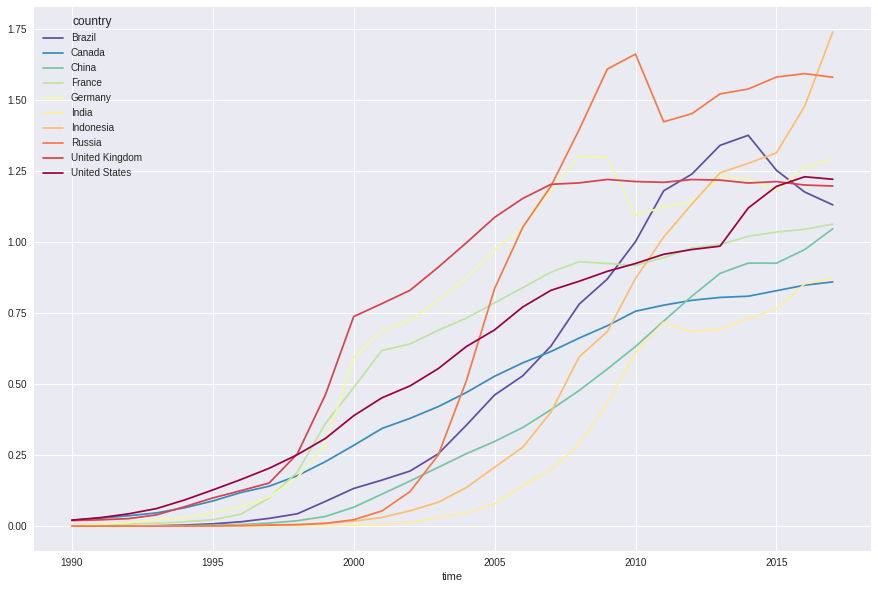

In [58]:
#now plotting it
import matplotlib.pyplot as plt
color_map = plt.cm.Spectral_r

df_mask_pivot2.T.plot(figsize=(15,10),cmap = color_map);